In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Membaca Data
data = pd.read_csv('Sari_Rasa_Araya.csv', sep=';')
print(data.to_string(index=False))

                          nama makanan  kategori   harga  01/11/2024  02/11/2024  03/11/2024  04/11/2024  05/11/2024  06/11/2024  07/11/2024  07/11/2024.1  09/11/2024  10/11/2024  11/11/2024  12/11/2024  13/11/2024  14/11/2024  15/11/2024  16/11/2024  17/11/2024  18/11/2024  19/11/2024  20/11/2024  21/11/2024  22/11/2024  23/11/2024  24/11/2024  25/11/2024  26/11/2024  27/11/2024  28/11/2024  29/11/2024  30/11/2024  rata-rata penjualan per bulan  01/01/1900  02/12/2024  03/12/2024  04/12/2024  05/12/2024  06/12/2024  rata-rata penjualan per bulan.1
                           nasi goreng      nasi 33000.0           8           5           4          11           8           6           7             5           8           5          10          11           4           4           7           5           5           6           9           3           7           4          12           7           5          13           8          11           7          10                           

In [ ]:
# Memastikan datanya ada
if 'nama makanan' not in data.columns or 'rata-rata penjualan per bulan' not in data.columns: # Changed 'df' to 'data'
    raise ValueError("Kolom 'Fnama makanan' atau 'rata-rata penjualan per bulan' tidak ditemukan dalam dataset")

# Menghitung 10 makanan terlaris
# kelompokka data berdasarkan nama makanan dan rata rata penjualan per bulan
top_foods = data.groupby('nama makanan')['rata-rata penjualan per bulan'].sum().sort_values(ascending=False).head(10) # Changed 'df' to 'data'

# Menampilkan hasil
print("10 Makanan Terlaris:")
print(top_foods)

10 Makanan Terlaris:
nama makanan
total penjualan per hari    2202000
nasi goreng                       7
ayam goreng mentega               4
capjay goreng                     3
fuyunghai kepiting                3
koloke                            3
mie goreng                        3
tamie capjay                      2
nasi goreng seafood               2
nasi goreng mawut                 2
Name: rata-rata penjualan per bulan, dtype: int64


<ipython-input-4-70333eedb291>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_foods, y=top_foods.index, palette="viridis")


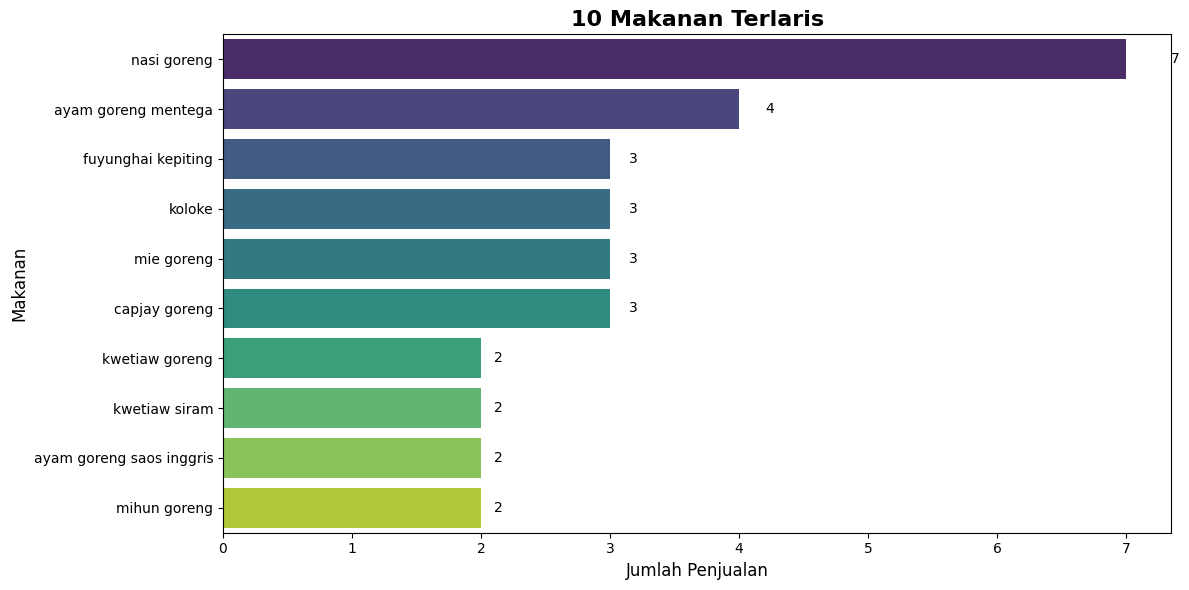

In [ ]:
# Menghapus kategori tidak relevan sebelum analisis
data_filtered = data[~data['nama makanan'].str.contains('total penjualan', case=False)]

# Menghitung 10 makanan terlaris
top_foods = data_filtered.groupby('nama makanan')['rata-rata penjualan per bulan'].sum().sort_values(ascending=False).head(10)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_foods, y=top_foods.index, palette="viridis")

# Menambahkan nilai di atas setiap batang
for i, value in enumerate(top_foods):
    plt.text(value + 0.05 * value, i, f"{value:.0f}", va='center', fontsize=10)

# Menambahkan judul dan label
plt.title("10 Makanan Terlaris", fontsize=16, fontweight='bold')
plt.xlabel("Jumlah Penjualan", fontsize=12)
plt.ylabel("Makanan", fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [ ]:
selected_columns = ['nama makanan', 'kategori', 'harga', 'rata-rata penjualan per bulan']
data_cleaned = data[selected_columns]

<ipython-input-6-f15a8350f748>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_cleaned, x='kategori', y='rata-rata penjualan per bulan', ci=None, palette='Set2')
<ipython-input-6-f15a8350f748>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cleaned, x='kategori', y='rata-rata penjualan per bulan', ci=None, palette='Set2')


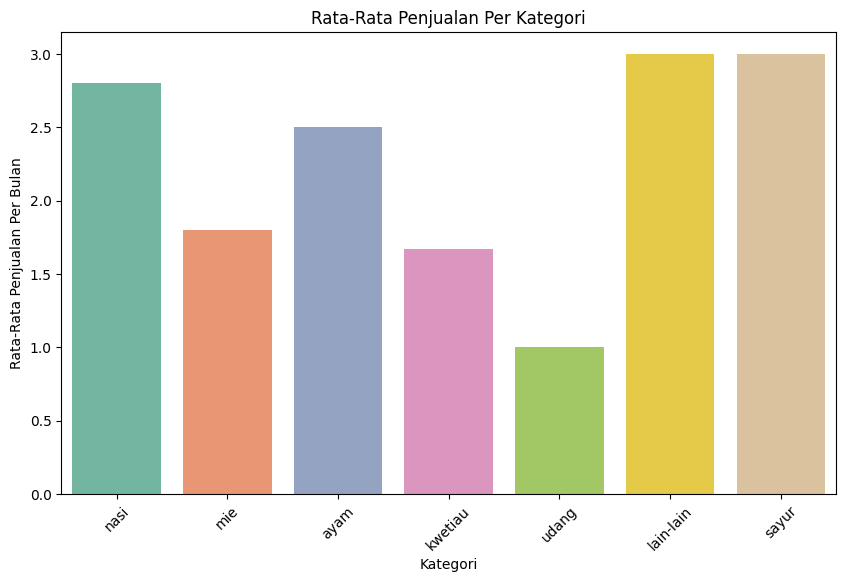

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x='kategori', y='rata-rata penjualan per bulan', ci=None, palette='Set2')
plt.title("Rata-Rata Penjualan Per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Rata-Rata Penjualan Per Bulan")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
# Define x and y
tfidf = TfidfVectorizer(max_features=5000, stop_words='indonesian')

X = data['nama makanan']
y = data['kategori']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()  # Membuat objek vektorizer TF-IDF
X_train = vectorizer.fit_transform(X_train)  # Sesuaikan dan ubah the training data
X_test = vectorizer.transform(X_test)  # mengubah testing data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Naive Bayes Report:
               precision    recall  f1-score   support

        ayam       0.00      0.00      0.00         0
     kwetiau       1.00      1.00      1.00         1
         mie       0.00      0.00      0.00         1
        nasi       1.00      1.00      1.00         2
       udang       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.40      0.40      0.40         5
weighted avg       0.60      0.60      0.60         5

SVM Report:
               precision    recall  f1-score   support

        ayam       0.00      0.00      0.00         0
     kwetiau       1.00      1.00      1.00         1
         mie       1.00      1.00      1.00         1
        nasi       1.00      1.00      1.00         2
       udang       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.60      0.60      0.60         5
weighted avg       0.80      0.80      0.80

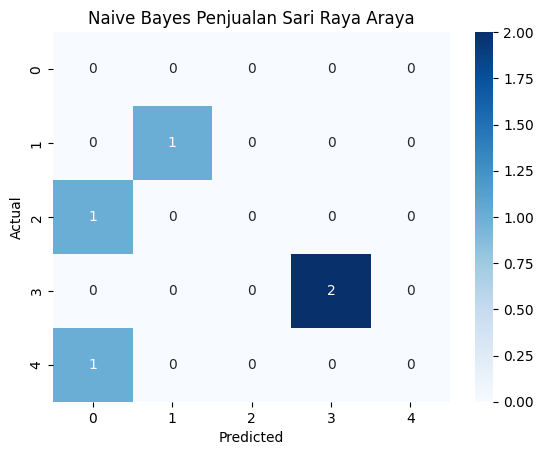

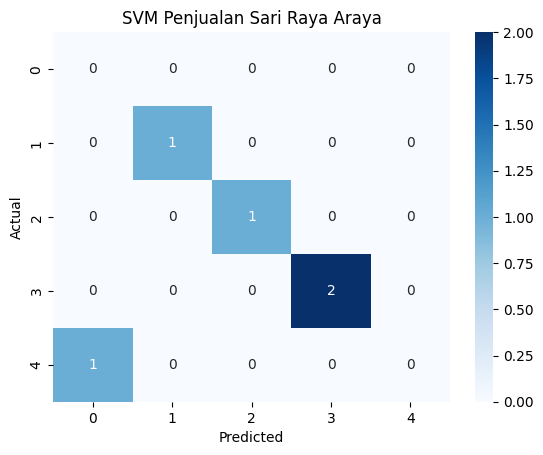

In [ ]:
# Model Training dan Evaluasi
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

# Model 2: SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluasi Model
print("Naive Bayes Report:\n", classification_report(y_test, nb_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

# Visualisasi Hasil
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Penjualan Sari Raya Araya')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_conf_matrix(y_test, nb_pred, "Naive Bayes")
plot_conf_matrix(y_test, svm_pred, "SVM")

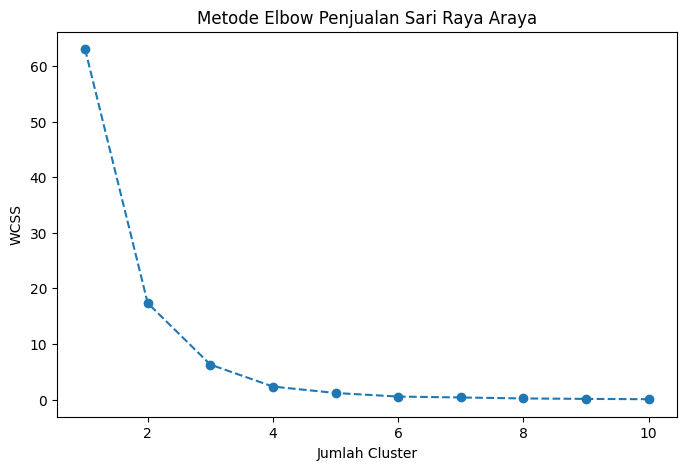

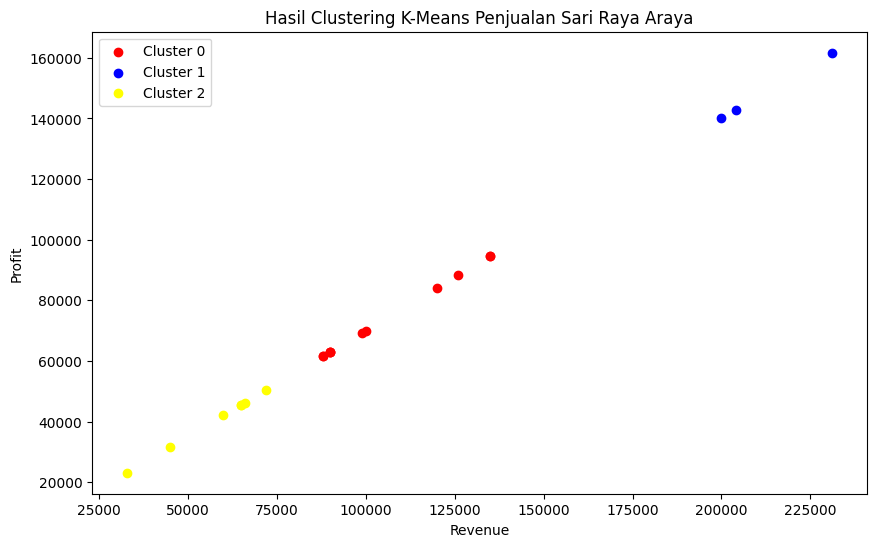

,nama makanan,kategori,harga,01/11/2024,02/11/2024,03/11/2024,04/11/2024,05/11/2024,06/11/2024,07/11/2024,...,02/12/2024,03/12/2024,04/12/2024,05/12/2024,06/12/2024,rata-rata penjualan per bulan.1,Revenue,Cost,Profit,Cluster
0,nasi goreng,nasi,33000.0,8,5,4,11,8,6,7,...,6,8,8,8,10,8,231000.0,69300.0,161700.0,1
1,nasi goreng kepiting,nasi,65000.0,1,0,2,3,1,2,0,...,0,0,2,2,0,1,65000.0,19500.0,45500.0,2
2,nasi goreng seafood,nasi,60000.0,4,2,2,3,0,4,3,...,1,1,2,1,1,1,120000.0,36000.0,84000.0,0
3,nasi goreng mawut,nasi,36000.0,2,1,3,0,1,2,4,...,4,4,3,3,3,3,72000.0,21600.0,50400.0,2
4,nasi goreng istimewa (ayam + kepiting),nasi,63000.0,1,2,1,4,2,3,5,...,3,3,3,2,2,3,126000.0,37800.0,88200.0,0
5,mie goreng,mie,33000.0,2,4,6,7,3,2,6,...,7,6,6,5,5,6,99000.0,29700.0,69300.0,0
6,mihun goreng,mie,33000.0,0,2,4,2,1,2,4,...,2,2,1,2,3,2,66000.0,19800.0,46200.0,2
7,tamie capjay,mie,45000.0,0,0,2,1,2,1,3,...,4,4,0,2,2,2,90000.0,27000.0,63000.0,0
8,misua,mie,33000.0,0,1,0,3,1,2,1,...,2,0,2,0,0,1,33000.0,9900.0,23100.0,2
9,lomie,mie,45000.0,0,1,2,2,0,1,0,...,0,0,1,0,0,1,45000.0,13500.0,31500.0,2


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['harga'].plot(kind='hist', bins=20, title='harga')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['01/11/2024'].plot(kind='hist', bins=20, title='01/11/2024')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['02/11/2024'].plot(kind='hist', bins=20, title='02/11/2024')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('kategori').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='harga', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='harga', y='01/11/2024', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='01/11/2024', y='02/11/2024', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='02/11/2024', y='03/11/2024', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['harga']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('harga')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['01/11/2024']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('01/11/2024')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['02/11/2024']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('02/11/2024')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['03/11/2024']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('03/11/2024')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['harga'].plot(kind='line', figsize=(8, 4), title='harga')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['01/11/2024'].plot(kind='line', figsize=(8, 4), title='01/11/2024')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['02/11/2024'].plot(kind='line', figsize=(8, 4), title='02/11/2024')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['kategori'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='kategori', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['kategori'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='harga', y='kategori', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['kategori'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='01/11/2024', y='kategori', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['kategori'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='02/11/2024', y='kategori', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Membuat DataFrame
df = pd.DataFrame(data)

df['Revenue'] = df['harga'] * df['rata-rata penjualan per bulan']
df['Cost'] = df['harga'] * 0.30 * df['rata-rata penjualan per bulan']
df['Profit'] = df['Revenue'] - df['Cost']

# Memilih fitur untuk clustering
features = ['Revenue', 'Cost', 'Profit']
X = df[features]

# Mengatasi nilai NaN sebelum standarisasi
X = X.fillna(X.mean()) # Mengisi nilai NaN dengan nilai rata-rata kolom

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow Penjualan Sari Raya Araya')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Memilih jumlah cluster (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'yellow']
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Revenue'], cluster_data['Profit'],
                color=colors[i], label=f'Cluster {i}')

plt.title('Hasil Clustering K-Means Penjualan Sari Raya Araya')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Menampilkan DataFrame dengan cluster
df